In [17]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Preaparation
input_file = 'data.csv'
output_file = 'cleaned_data.csv'

with open(input_file, 'r', encoding='utf-8') as f_in, open(output_file, 'w', encoding='utf-8') as f_out:
    for line in f_in:
        # Split by comma to count columns
        columns = line.strip().split(',')
        # Check if line has exactly 34 columns
        if len(columns) == 34:
            f_out.write(line)

In [3]:
df = pd.read_csv("cleaned_data.csv")
df.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,WHOSIS_000001,Life expectancy at birth (years),text,AFR,Africa,Country,LSO,Lesotho,Year,2021,...,NaN,NaN,47.80,NaN,49.70,48.7 [47.8-49.7],NaN,NaN,EN,2024-08-01T22:00:00.000Z
1,WHOSIS_000001,Life expectancy at birth (years),text,AFR,Africa,Country,CAF,Central African Republic,Year,2021,...,NaN,NaN,48.45,NaN,50.92,49.6 [48.5-50.9],NaN,NaN,EN,2024-08-01T22:00:00.000Z
2,WHOSIS_000001,Life expectancy at birth (years),text,AFR,Africa,Country,LSO,Lesotho,Year,2021,...,NaN,NaN,50.49,NaN,52.57,51.5 [50.5-52.6],NaN,NaN,EN,2024-08-01T22:00:00.000Z
3,WHOSIS_000001,Life expectancy at birth (years),text,AFR,Africa,Country,SWZ,Eswatini,Year,2021,...,NaN,NaN,50.73,NaN,52.82,51.6 [50.7-52.8],NaN,NaN,EN,2024-08-01T22:00:00.000Z
4,WHOSIS_000001,Life expectancy at birth (years),text,EMR,Eastern Mediterranean,Country,SOM,Somalia,Year,2021,...,NaN,NaN,50.62,NaN,53.10,51.7 [50.6-53.1],NaN,NaN,EN,2024-08-01T22:00:00.000Z


In [4]:
def fill_columns(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):  # Check if column is numeric
            df[col].fillna(df[col].mean(), inplace=True)  # Fill NaN with mean
        else:  # Non-numeric columns
            most_frequent = df[col].mode().iloc[0]  # Get the most frequent value
            df[col].fillna(most_frequent, inplace=True)  # Fill NaN with the mode
    return df

In [5]:
df.dropna(axis=1, how='all', inplace=True)
df.dropna(how="any", inplace=True)
fill_columns(df)

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,IsLatestYear,Dim1 type,Dim1,Dim1ValueCode,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value,Language,DateModified
0,WHOSIS_000001,Life expectancy at birth (years),text,AFR,Africa,Country,LSO,Lesotho,Year,2021,True,Sex,Male,SEX_MLE,48.73,47.80,49.70,48.7 [47.8-49.7],EN,2024-08-01T22:00:00.000Z
1,WHOSIS_000001,Life expectancy at birth (years),text,AFR,Africa,Country,CAF,Central African Republic,Year,2021,True,Sex,Male,SEX_MLE,49.57,48.45,50.92,49.6 [48.5-50.9],EN,2024-08-01T22:00:00.000Z
2,WHOSIS_000001,Life expectancy at birth (years),text,AFR,Africa,Country,LSO,Lesotho,Year,2021,True,Sex,Both sexes,SEX_BTSX,51.48,50.49,52.57,51.5 [50.5-52.6],EN,2024-08-01T22:00:00.000Z
3,WHOSIS_000001,Life expectancy at birth (years),text,AFR,Africa,Country,SWZ,Eswatini,Year,2021,True,Sex,Male,SEX_MLE,51.64,50.73,52.82,51.6 [50.7-52.8],EN,2024-08-01T22:00:00.000Z
4,WHOSIS_000001,Life expectancy at birth (years),text,EMR,Eastern Mediterranean,Country,SOM,Somalia,Year,2021,True,Sex,Male,SEX_MLE,51.75,50.62,53.10,51.7 [50.6-53.1],EN,2024-08-01T22:00:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24283,WHOSIS_000015,Life expectancy at age 60 (years),text,EUR,Europe,Country,CHE,Switzerland,Year,2000,False,Sex,Female,SEX_FMLE,24.80,24.78,24.87,24.8 [24.8-24.9],EN,2024-08-01T22:00:00.000Z
24284,WHOSIS_000015,Life expectancy at age 60 (years),text,WPR,Western Pacific,Country,AUS,Australia,Year,2000,False,Sex,Female,SEX_FMLE,24.85,24.79,24.91,24.9 [24.8-24.9],EN,2024-08-01T22:00:00.000Z
24285,WHOSIS_000015,Life expectancy at age 60 (years),text,EUR,Europe,Country,FRA,France,Year,2000,False,Sex,Female,SEX_FMLE,25.29,25.24,25.33,25.3 [25.2-25.3],EN,2024-08-01T22:00:00.000Z
24286,WHOSIS_000015,Life expectancy at age 60 (years),text,AMR,Americas,Country,NIC,Nicaragua,Year,2000,False,Sex,Female,SEX_FMLE,25.57,25.48,25.72,25.6 [25.5-25.7],EN,2024-08-01T22:00:00.000Z


### Task1 

In [12]:
grouped_life_expectancy = df.groupby('ParentLocation')['FactValueNumeric'].mean()
print(grouped_life_expectancy)

ParentLocation
Africa                   37.927800
Americas                 47.592494
Eastern Mediterranean    44.840390
Europe                   48.419559
South-East Asia          44.473258
Western Pacific          45.260491
Name: FactValueNumeric, dtype: float64


49 37


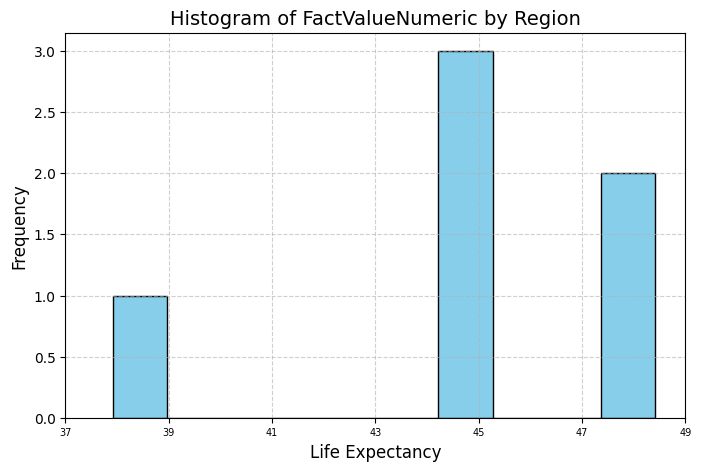

In [28]:
plt.figure(figsize=(8, 5))
plt.hist(grouped_life_expectancy, bins=10, color='skyblue', edgecolor='black')

# Adding titles and labels
max=math.ceil(grouped_life_expectancy.max())
min=int(grouped_life_expectancy.min())
plt.xticks(np.arange(min, max+1, 2), fontsize=7)
plt.title('Histogram of FactValueNumeric by Region', fontsize=14)
plt.xlabel('Life Expectancy', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Task2

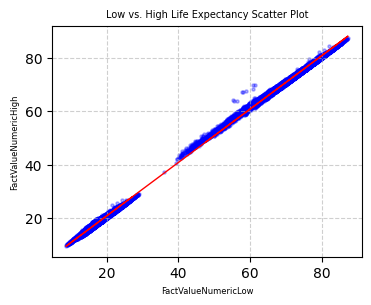

In [36]:
plt.figure(figsize=(4, 3))
x = df['FactValueNumericLow']
y = df['FactValueNumericHigh']
plt.scatter(x, y, color='blue', alpha=0.3, s=5)

#plt.xticks(np.arange(100, 801, 50), fontsize=7)
coefficients = np.polyfit(x, y, 1)  # 1 = linear
slope, intercept = coefficients

trendline = slope * x + intercept

plt.plot(x, trendline, color='red', linewidth=1, label='Trendline')
plt.title('Low vs. High Life Expectancy Scatter Plot', fontsize=7)
plt.xlabel('FactValueNumericLow', fontsize=6)
plt.ylabel('FactValueNumericHigh', fontsize=6)

plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()

### Task3